# *Heterogeneous Catalyst Database*

## Import Data

In [1]:
import pandas as pd
import json

data=json.load(open('dataset.json')) #download json file as data

In [2]:
df=pd.json_normalize(data["results"]) #we are interested in the "results" column and so we normalize all columns. 
df

,adsorption_measurement.adsorption_energy,adsorption_measurement.doi,adsorption_measurement.external_note,adsorption_measurement.internal_note,adsorption_measurement.is_most_stable_site,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,...,adsorption_measurement.emn_user.affiliation,adsorption_measurement.emn_user.email,adsorption_measurement.approver,adsorption_measurement.adsorption_site,adsorption_measurement.bulk_surface_property_set.lattice_constant,adsorption_measurement.bulk_surface_property_set.cell_symmetry,adsorption_measurement.bulk_surface_property_set.secondary_bulk_class.name,adsorption_measurement.bulk_surface_property_set.first_layer_composition.name,adsorption_measurement.bulk_surface_property_set.second_layer_composition.name,adsorption_measurement.bulk_surface_property_set.facet
0,-4.29,10.1016/S0039-6028(01)01464-9,None,None,True,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,...,NREL,Tuong.Bui@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.56,10.1016/S0039-6028(01)01464-9,None,None,True,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,...,NREL,Tuong.Bui@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-3.14,10.1016/0039-6028(95)01141-2,None,None,True,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.5,10.1016/0039-6028(95)01141-2,None,None,True,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,...,NREL,Tuong.Bui@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.67,10.1016/S0039-6028(99)00489-6,None,None,True,VASP,PW91,plane wave,ultrasoft pseudopotential,None,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.72,10.1021/acscatal.8b00201,None,The original Rh data for this paper is from an...,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,1.66,10.1021/acscatal.8b00201,None,The original Rh data for this paper is from an...,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,-1.57,10.1021/acscatal.8b00201,None,The original Rh data for this paper is from an...,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,-2.51,10.1021/acscatal.8b00201,None,The original Rh data for this paper is from an...,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,...,NREL,Matthew.Jankousky@nrel.gov,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown above, there are 51 columns when they are all stretched out.\
Some of these values are clearly not relevant and so the data must be organized.

In [3]:
df.to_csv("dataset.csv", index=False)

## Organize Data
Columns that are chemically and physically relevant for predicting adsorption energies will only be used.\
Out of the 51 columns, we must pick out attributes that are relevant.\
Initially, the trivially irrelevant attributes such as doi, author, and attributes with no data are dropped from the dataset.\
First, the obvious ones are the following:\
['adsorption_measurement.doi', 'adsorption_measurement.external_note', 'adsorption_measurement.internal_note', 'adsorption_measurement.bulk_surface_property_set.secondary_bulk_class', 'adsorption_measurement.bulk_surface_property_set.second_layer_composition', 'adsorption_measurement.bulk_surface_property_set.first_layer_composition', 'adsorption_measurement.emn_user.first_name', 'adsorption_measurement.emn_user.last_name', 'adsorption_measurement.emn_user.affiliation', 'adsorption_measurement.emn_user.email', 'adsorption_measurement.approver', 'adsorption_measurement.adsorption_site', 'adsorption_measurement.bulk_surface_property_set.lattice_constant', 'adsorption_measurement.bulk_surface_property_set.cell_symmetry', 'adsorption_measurement.bulk_surface_property_set.secondary_bulk_class.name', 'adsorption_measurement.bulk_surface_property_set.first_layer_composition.name', 'adsorption_measurement.bulk_surface_property_set.second_layer_composition.name', 'adsorption_measurement.bulk_surface_property_set.facet']

In [4]:
obvious_drops = ['adsorption_measurement.doi', 'adsorption_measurement.external_note', 'adsorption_measurement.internal_note', 'adsorption_measurement.bulk_surface_property_set.secondary_bulk_class', 'adsorption_measurement.bulk_surface_property_set.second_layer_composition', 'adsorption_measurement.bulk_surface_property_set.first_layer_composition', 'adsorption_measurement.emn_user.first_name', 'adsorption_measurement.emn_user.last_name', 'adsorption_measurement.emn_user.affiliation', 'adsorption_measurement.emn_user.email', 'adsorption_measurement.approver', 'adsorption_measurement.adsorption_site', 'adsorption_measurement.bulk_surface_property_set.lattice_constant', 'adsorption_measurement.bulk_surface_property_set.cell_symmetry', 'adsorption_measurement.bulk_surface_property_set.secondary_bulk_class.name', 'adsorption_measurement.bulk_surface_property_set.first_layer_composition.name', 'adsorption_measurement.bulk_surface_property_set.second_layer_composition.name', 'adsorption_measurement.bulk_surface_property_set.facet']
df = df.drop(columns=obvious_drops)
df

,adsorption_measurement.adsorption_energy,adsorption_measurement.is_most_stable_site,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,...,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_2,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_3,adsorption_measurement.bulk_surface_property_set.facet.name,adsorption_measurement.bulk_surface_property_set.cell_symmetry.name,adsorption_measurement.adsorbate_fraction.fraction,adsorption_measurement.adsorbate_fraction.numeric,adsorption_measurement.adsorbate_fraction.unit,adsorption_measurement.adsorption_site.site_name,adsorption_measurement.adsorption_reference_species_set
0,-4.29,True,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,...,3.660,NaN,NaN,(111),2x2,1/4,0.25,Cu,fcc,"[{'reference_coefficient': 1, 'species': {'for..."
1,-0.56,True,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,...,3.660,NaN,NaN,(111),2x2,1/4,0.25,Cu,b-h-b,"[{'reference_coefficient': 1, 'species': {'for..."
2,-3.14,True,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,...,4.190,NaN,NaN,(110),3x2,1/6,0.1667,Ag,fourfold hollow,"[{'reference_coefficient': 1, 'species': {'for..."
3,-0.5,True,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,...,4.190,NaN,NaN,(110),3x2,1/6,0.1667,Ag,fourfold hollow (1-10),"[{'reference_coefficient': 1, 'species': {'for..."
4,-1.67,True,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,...,3.532,NaN,NaN,(111),4x2,1/4,0.25,Ni,t-hcp-b,"[{'reference_coefficient': 1, 'species': {'for..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.72,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,...,NaN,NaN,NaN,(111),3x3,1/9,0.1111,Rh,terrace,"[{'reference_coefficient': 1, 'species': {'for..."
1996,1.66,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,...,NaN,NaN,NaN,(111),3x3,1/9,0.1111,Ag,terrace,"[{'reference_coefficient': 1, 'species': {'for..."
1997,-1.57,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH3O,...,NaN,NaN,NaN,(111),3x3,1/9,0.1111,Rh,terrace,"[{'reference_coefficient': 1, 'species': {'for..."
1998,-2.51,True,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CHCO,...,NaN,NaN,NaN,(111),3x3,1/9,0.1111,Ir,terrace,"[{'reference_coefficient': 1.5, 'species': {'f..."


Now, 51 columns were now reduced to 33 columns.\
Additionally, there are columns that isn't relevant to this study or doesn't have any variability that would not contribute to our predictions. Therefore, these columns will also be manually droped. 
The additionally dropped columns are the following:\
['adsorption_measurement.is_most_stable_site', 'adsorption_measurement.adsorbate_species.name', 'adsorption_measurement.adsorbate_species.elemental_formula', 'adsorption_measurement.bulk_surface_property_set.is_stretched', 'adsorption_measurement.bulk_surface_property_set.is_compressed', 'adsorption_measurement.bulk_surface_property_set.nano_number_of_atoms', 'adsorption_measurement.bulk_surface_property_set.bulk_surface_material.elemental_formula', 'adsorption_measurement.adsorbate_fraction.fraction', 'adsorption_measurement.adsorption_reference_species_set', 'adsorption_measurement.bulk_surface_property_set.primary_bulk_class.name']

In [5]:
additional_drops = ['adsorption_measurement.is_most_stable_site', 'adsorption_measurement.adsorbate_species.name', 'adsorption_measurement.adsorbate_species.elemental_formula', 'adsorption_measurement.bulk_surface_property_set.is_stretched', 'adsorption_measurement.bulk_surface_property_set.is_compressed', 'adsorption_measurement.bulk_surface_property_set.nano_number_of_atoms', 'adsorption_measurement.bulk_surface_property_set.bulk_surface_material.elemental_formula', 'adsorption_measurement.adsorbate_fraction.fraction', 'adsorption_measurement.adsorption_reference_species_set', 'adsorption_measurement.bulk_surface_property_set.primary_bulk_class.name']
df = df.drop(columns=additional_drops)
df

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,adsorption_measurement.bulk_surface_property_set.space_group,adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_2,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_3,adsorption_measurement.bulk_surface_property_set.facet.name,adsorption_measurement.bulk_surface_property_set.cell_symmetry.name,adsorption_measurement.adsorbate_fraction.numeric,adsorption_measurement.adsorbate_fraction.unit,adsorption_measurement.adsorption_site.site_name
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,Fm3m,Cu,3.660,NaN,NaN,(111),2x2,0.25,Cu,fcc
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,Fm3m,Cu,3.660,NaN,NaN,(111),2x2,0.25,Cu,b-h-b
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,Fm3m,Ag,4.190,NaN,NaN,(110),3x2,0.1667,Ag,fourfold hollow
3,-0.5,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,Fm3m,Ag,4.190,NaN,NaN,(110),3x2,0.1667,Ag,fourfold hollow (1-10)
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,None,Ni,3.532,NaN,NaN,(111),4x2,0.25,Ni,t-hcp-b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.72,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,Fm3m,Rh,NaN,NaN,NaN,(111),3x3,0.1111,Rh,terrace
1996,1.66,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,None,Ag,NaN,NaN,NaN,(111),3x3,0.1111,Ag,terrace
1997,-1.57,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH3O,C[O],...,Fm3m,Rh,NaN,NaN,NaN,(111),3x3,0.1111,Rh,terrace
1998,-2.51,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CHCO,[O]C#C,...,None,Ir,NaN,NaN,NaN,(111),3x3,0.1111,Ir,terrace


Now we are down to 23 columns!\
The attributes that are left are ones that have some level of chemical importance.\
Therefore, we need to assess the chemical importance of each attribute.\
Below, we have a list of all variables left. Some of there attributes are currently in forms that cannot be interpreted as number and therfore must be reformulated. 

In [6]:
df.columns

Index(['adsorption_measurement.adsorption_energy',
       'adsorption_measurement.method.software',
       'adsorption_measurement.method.exchange_correlation',
       'adsorption_measurement.method.basis_set',
       'adsorption_measurement.method.potentials',
       'adsorption_measurement.method.is_spin_polarization',
       'adsorption_measurement.method.is_zero_point_energy',
       'adsorption_measurement.method.is_fixed_substrate',
       'adsorption_measurement.adsorbate_species.formula',
       'adsorption_measurement.adsorbate_species.smiles',
       'adsorption_measurement.adsorbate_species.molecular_formula',
       'adsorption_measurement.adsorbate_species.connectivity_smiles',
       'adsorption_measurement.bulk_surface_property_set.termination',
       'adsorption_measurement.bulk_surface_property_set.space_group',
       'adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name',
       'adsorption_measurement.bulk_surface_property_set.lattice_constan

In [7]:
def mean_float(list):
    sum = 0
    for item in list:
        sum += float(item)
    return sum/len(list)

#### Label
**Adsorption_energy:** This is the overall change in energy of the system as two systems come together. In this context, this is the change in energy of the overall system as a small molecule is adsorbed onto a metal surface. The more negative the adsorption energy is, the more likely the adsorption process will occur.

In [8]:
df.head()
df["adsorption_measurement.adsorption_energy"] = pd.to_numeric(df["adsorption_measurement.adsorption_energy"])

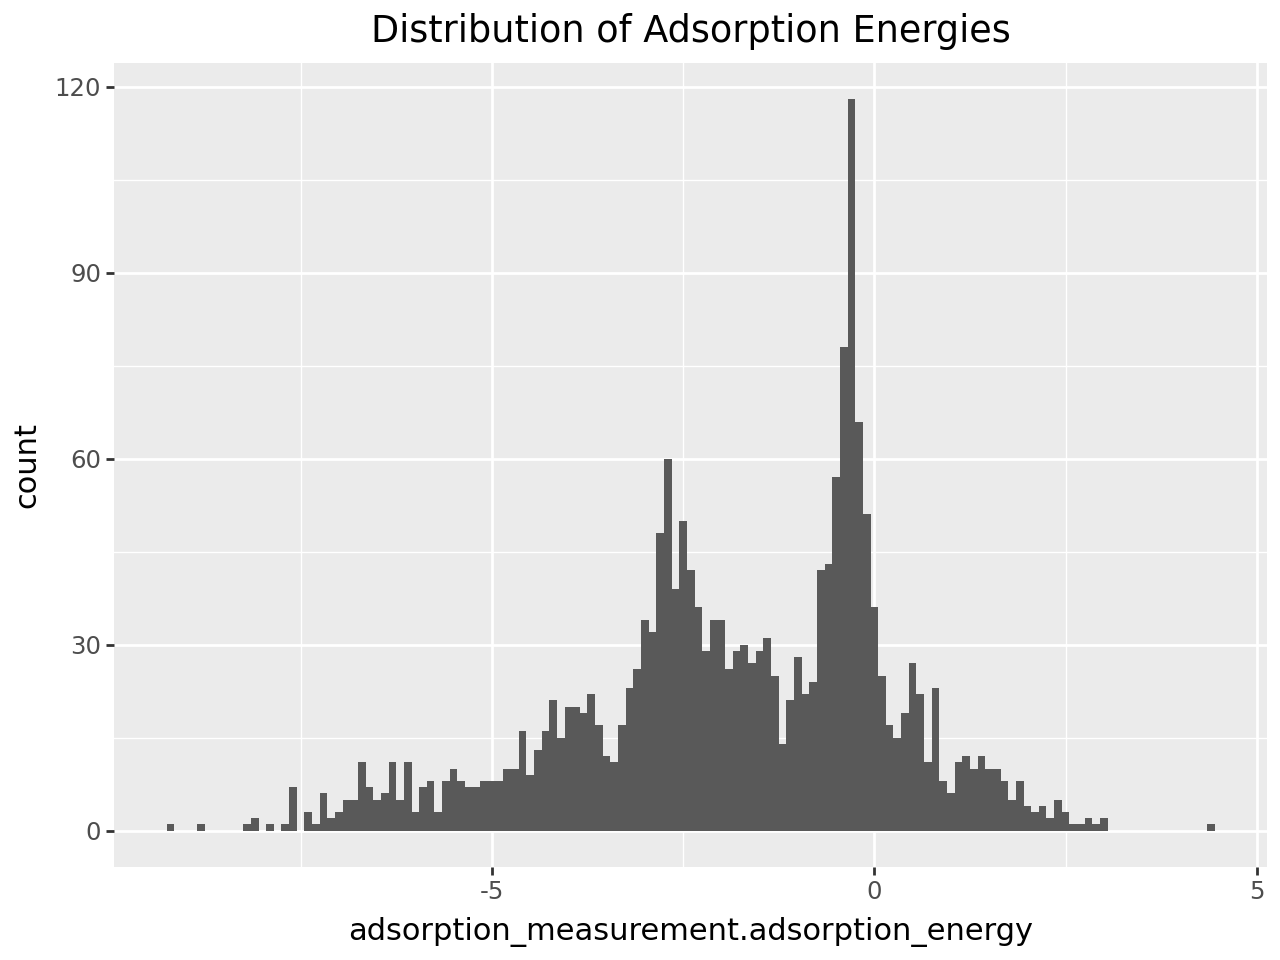

In [9]:
from plotnine import ggplot, aes, geom_histogram, ggtitle
(
    ggplot(df, aes(x="adsorption_measurement.adsorption_energy"))
    + geom_histogram(binwidth=0.1)
    +ggtitle("Distribution of Adsorption Energies")
)

In [10]:
mean = pd.DataFrame(df["adsorption_measurement.adsorption_energy"]).astype(float).mean()
min = pd.DataFrame(df["adsorption_measurement.adsorption_energy"]).astype(float).min()
max = pd.DataFrame(df["adsorption_measurement.adsorption_energy"]).astype(float).max()
print(mean, min, max)

adsorption_measurement.adsorption_energy   -1.83866
dtype: float64 adsorption_measurement.adsorption_energy   -9.2
dtype: float64 adsorption_measurement.adsorption_energy    4.39
dtype: float64


### Method:
These set of attributes describe details of the computational method used for this study. These values are categorical and will be organized through one-hot encoding in the actual implementation.

**Software:** The software/code that was used for the study. Popular ones include VASP (Vienna ab initio simulation package) and GPAW (Projector augmented wave).\
**Exchange-correlation:** Exchange correlation energy is the functional that is used to approximate non-interacting kinetic energy and electron-nuclear electrostatic terms.\
**Basis set:** These determine how electron densities are initially allocated onto the molecule. However, there are not many variations of this attribute in the dataset. Therefore we may want to consider eliminating this variable.\
**Potentials:** Here, pseudo-potentials are used to approximate the electrostatic electron-nuclear and electron-electron interaction.\
**Spin Polarization:** This is a boolean that tells you whether or not spin polarization was done on the calculations.\
**Zero Point Energy:** This is a boolean that tells you whether the molecule was zero point energy corrcted.\
**Fixed Substrate:** This attribute tells you whether or not the substrate (in this case metal) was able to relax or not during the optimization process. 

### Adsorbate: 
These set of attributes describe the small molecule that is being adsorbed onto the substrate. 
Upon close inspection, the formula and molecular formula contained the same information. Therefore formula was eliminated from the dataset.\
**formula:** chemical formula. \
**smiles:** smiles is an abbreviated way to represent chemicals as strings.\
**molecular_formula:** same as formula.\
**connectivity_smiles** connectivity smiles is a slight variation of smiles. 
However, none of these attributes are currently interpretable in a meaningful way. The information in here must be extracted and transformed. So that these attributes are numerically interpretable, the chemical symbols must be converted. 

#### Reformulated Adsorbate Variables:
**num_atoms:** The number of atoms in the molecule. For instance, for HCOOH, this variable will be 5.\
**num_atomic_num:** This is will how many of each atomic number atom exist in the molecule.\
**num_bond_1:** The number of single bonds.\
**num_bond_2:** The number of double bonds.\
**num_bond_3:** The number of triple bonds.

#### Advanced Bonding Representation of Adsorbate:
Now, if we want to take the bonding of each molecule into account, we can create a 1D matrix that shows how many bonds are between C and H, C and C for instance which may be especially effective for organic molecules. 

##### Implementation of num_atoms

In [11]:
import re
def to_num_atom(molecule):
    sum = 0
    atom_list = []
    atom_list = re.findall('[A-Z][^A-Z]*', molecule)
    for atom in atom_list:
        if not atom[len(atom)-1].isnumeric():
            sum += 1
        if atom[len(atom)-1].isnumeric():
            sum += int(atom[len(atom)-1])
    return sum

In [12]:
df["adsorbate_num_atoms"] = df["adsorption_measurement.adsorbate_species.formula"].apply(to_num_atom)

In [13]:
df.head()

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_2,adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_3,adsorption_measurement.bulk_surface_property_set.facet.name,adsorption_measurement.bulk_surface_property_set.cell_symmetry.name,adsorption_measurement.adsorbate_fraction.numeric,adsorption_measurement.adsorbate_fraction.unit,adsorption_measurement.adsorption_site.site_name,adsorbate_num_atoms
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,Cu,3.660,NaN,NaN,(111),2x2,0.25,Cu,fcc,1
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,Cu,3.660,NaN,NaN,(111),2x2,0.25,Cu,b-h-b,2
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,Ag,4.190,NaN,NaN,(110),3x2,0.1667,Ag,fourfold hollow,1
3,-0.50,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,Ag,4.190,NaN,NaN,(110),3x2,0.1667,Ag,fourfold hollow (1-10),2
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,Ni,3.532,NaN,NaN,(111),4x2,0.25,Ni,t-hcp-b,2


##### Implementation of num_atomic_num

In [14]:
periodic = {
    "H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne":10, 
    "Na": 11, "Mg": 12, "Al": 13, "Si": 14, "P": 15, "S": 16, "Cl": 17, "Ar": 18,
    "K": 19, "Ca": 20, "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27, "Ni": 28, "Cu": 29, "Zn": 30, "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36,
    "Rb": 37, "Sr": 38, "Y": 39, "Zr": 40, "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46, "Ag": 47, "Cd": 48, "In": 49, "Sn": 50, "Sb": 51, "Te": 52, "I": 53, "Xe": 54, 
    "Cs": 55, "Ba": 56, "Hf": 72, "Ta": 73, "W": 74, "Re": 75, "Os": 76, "Ir": 77, "Pt": 78, "Au": 79, "Hg": 80, "Tl": 81, "Pb": 82, "Bi": 83, "Po": 84, "At":85, "Rn": 86
}
adsorbate_atomic = {
    1: [0] * 2000, 2: [0] * 2000, 3: [0] * 2000, 4: [0] * 2000, 5: [0] * 2000, 6: [0] * 2000, 7: [0] * 2000, 8: [0] * 2000, 9: [0] * 2000, 10:[0] * 2000,
    11: [0] * 2000, 12: [0] * 2000, 13:[0] * 2000, 14:[0] * 2000, 15:[0] * 2000, 16:[0] * 2000, 17:[0] * 2000, 18:[0] * 2000, 19:[0] * 2000, 20:[0] * 2000,
    21: [0] * 2000, 22:[0] * 2000, 23:[0] * 2000, 24:[0] * 2000, 25:[0] * 2000, 26:[0] * 2000, 27:[0] * 2000, 28:[0] * 2000, 29:[0] * 2000, 30:[0] * 2000, 
}
for instance in range(2000):
    atom_list = []
    atom_list = re.findall('[A-Z][^A-Z]*', df["adsorption_measurement.adsorbate_species.formula"][instance])
    sum = 0
    counter = 0
    for atom in atom_list:
        if atom[len(atom)-1]=="(" or atom[len(atom)-1]==")":
            atom_list[counter] = atom_list[counter].rstrip("()") 
        counter += 1
    for atom in atom_list:
        if not atom[len(atom)-1].isnumeric():
            adsorbate_atomic[periodic[atom]][instance] += 1 
        if atom[len(atom)-1].isnumeric():
            number = int(atom[len(atom)-1])
            atom = atom.rstrip("123456789")
            adsorbate_atomic[periodic[atom]][instance] += number 

In [15]:
num_atomic_num = pd.DataFrame(adsorbate_atomic)
df = pd.concat([df, num_atomic_num], axis=1)
df

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,21,22,23,24,25,26,27,28,29,30
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,0,0,0,0,0,0,0,0,0,0
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,0,0,0,0,0,0,0,0,0,0
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,0,0,0,0,0,0,0,0,0,0
3,-0.50,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,0,0,0,0,0,0,0,0,0,0
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.72,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,0,0,0,0,0,0,0,0,0,0
1996,1.66,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,0,0,0,0,0,0,0,0,0,0
1997,-1.57,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH3O,C[O],...,0,0,0,0,0,0,0,0,0,0
1998,-2.51,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CHCO,[O]C#C,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df["adsorption_measurement.adsorbate_species.smiles"]

0          [O]
1          O=O
2          [O]
3          O=O
4          O=O
         ...  
1995      [CH]
1996      [CH]
1997      C[O]
1998    [O]C#C
1999         N
Name: adsorption_measurement.adsorbate_species.smiles, Length: 2000, dtype: object

In [18]:
bond = {
    "double": [0] * 2000,
    "triple": [0] * 2000
}
for instance in range(2000):
    molecule = df["adsorption_measurement.adsorbate_species.smiles"][instance]
    double = molecule.count("=")
    triple = molecule.count("#")
    bond["double"][instance] = double
    bond["triple"][instance] = triple

In [19]:
bond = pd.DataFrame(bond)
df = pd.concat([df, bond], axis=1)
df

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,23,24,25,26,27,28,29,30,double,triple
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,0,0,0,0,0,0,0,0,0,0
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,0,0,0,0,0,0,0,0,1,0
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,0,0,0,0,0,0,0,0,0,0
3,-0.50,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,0,0,0,0,0,0,0,0,1,0
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.72,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,0,0,0,0,0,0,0,0,0,0
1996,1.66,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH,[CH],...,0,0,0,0,0,0,0,0,0,0
1997,-1.57,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CH3O,C[O],...,0,0,0,0,0,0,0,0,0,0
1998,-2.51,Quantum ESPRESSO,BEEF-vdW,plane wave,projector augmented wave,None,None,False,CHCO,[O]C#C,...,0,0,0,0,0,0,0,0,0,1


### bulk surface property
**termination:** The metal that is used in the surface. \
**space_group:** They essentially provide the same information as cell-symetry. \
**bulk_surface_material.name:** Very simillar information to the termination and so will be omitted. \
**lattice_constant_1:** They are proportional to the distance between the atoms in the crystal lattice. \
**lattice_constant_2:** Has significantly many unfilled instances. \
**lattice_constant_3:** Has significantly many unfilled instances.  \
**facet.name:** If there are 3 numbers, the crystal is a cubic system and if there are 4 numbers, the crystal is a hexagonal system. \
**cell_symmetry.name:** The symmetry of the crystal lattice. Because there aren't many variations, this attribute will be one-hot encoded. 

#### reformulate termination

In [21]:
periodic = {
    "H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne":10, 
    "Na": 11, "Mg": 12, "Al": 13, "Si": 14, "P": 15, "S": 16, "Cl": 17, "Ar": 18,
    "K": 19, "Ca": 20, "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27, "Ni": 28, "Cu": 29, "Zn": 30, "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36,
    "Rb": 37, "Sr": 38, "Y": 39, "Zr": 40, "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46, "Ag": 47, "Cd": 48, "In": 49, "Sn": 50, "Sb": 51, "Te": 52, "I": 53, "Xe": 54, 
    "Cs": 55, "Ba": 56, "Hf": 72, "Ta": 73, "W": 74, "Re": 75, "Os": 76, "Ir": 77, "Pt": 78, "Au": 79, "Hg": 80, "Tl": 81, "Pb": 82, "Bi": 83, "Po": 84, "At":85, "Rn": 86
}
def termination_atomic_num(metal):
    metal = metal.replace("-", "")
    metal_list = re.findall('[A-Z][^A-Z]*', metal)
    sum = 0
    num_atom = 0
    for metal in metal_list:
        if not metal[len(metal)-1].isnumeric():
            if metal not in periodic:
                continue
            sum += periodic[metal]
            num_atom += 1
        if metal[len(metal)-1].isnumeric():
            number = int(metal[len(metal)-1])
            metal = metal.rstrip("123456789")
            if metal not in periodic:
                continue
            sum += number * periodic[metal]
            num_atom += number
    return sum/num_atom

In [22]:
df["termination_atomic_num"] = df["adsorption_measurement.bulk_surface_property_set.termination"].apply(termination_atomic_num)

In [23]:
df.head()

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,24,25,26,27,28,29,30,double,triple,termination_atomic_num
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,0,0,0,0,0,0,0,0,0,29.0
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,0,0,0,0,0,0,0,1,0,29.0
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,0,0,0,0,0,0,0,0,0,47.0
3,-0.50,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,0,0,0,0,0,0,0,1,0,47.0
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,0,0,0,0,0,0,0,1,0,28.0


#### reformulate facet name

In [24]:
import re
def facet_to_facet_num(facet):
    return re.sub("[^0-9]", "", str(facet))

In [25]:
df["facet_num"] = df["adsorption_measurement.bulk_surface_property_set.facet.name"].apply(facet_to_facet_num)

In [26]:
df.head()

,adsorption_measurement.adsorption_energy,adsorption_measurement.method.software,adsorption_measurement.method.exchange_correlation,adsorption_measurement.method.basis_set,adsorption_measurement.method.potentials,adsorption_measurement.method.is_spin_polarization,adsorption_measurement.method.is_zero_point_energy,adsorption_measurement.method.is_fixed_substrate,adsorption_measurement.adsorbate_species.formula,adsorption_measurement.adsorbate_species.smiles,...,25,26,27,28,29,30,double,triple,termination_atomic_num,facet_num
0,-4.29,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O,[O],...,0,0,0,0,0,0,0,0,29.0,111
1,-0.56,Dacapo,PW91,plane wave,ultrasoft pseudopotential,None,None,False,O2,O=O,...,0,0,0,0,0,0,1,0,29.0,111
2,-3.14,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O,[O],...,0,0,0,0,0,0,0,0,47.0,110
3,-0.50,CETEP,PW91,plane wave,norm-conserving pseudopotential,True,None,None,O2,O=O,...,0,0,0,0,0,0,1,0,47.0,110
4,-1.67,VASP,PW91,plane wave,ultrasoft pseudopotential,None,None,None,O2,O=O,...,0,0,0,0,0,0,1,0,28.0,111


### adsorbate_fraction and adsorption site
**adsorbate_fraction.numeric:** This represents the number of adsorbate per unit area of surface.\
**adsorbate_fraction.unit:**  This is the metal to which the adsorbate is adsorbed onto.\
**adsorption_site.site_name:** This is how the adsorbate binds onto the metal. Has a lot of missing values. 

Now with these operations, we have our final, overall dataset. 

In [28]:
df.to_csv("dataset_final.csv", index=False)

Now, we must investigate the distribution of our current attributes and assess whether we should add in values through imputation or not. 